In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
from pylab import *
from pysb.core import *
from pysb.bng import *
from pysb.integrate import *
import matplotlib.pyplot as plt
import numpy as np
from pysb.util import alias_model_components
from pysb.simulator import CupSodaSimulator
from pysb.simulator import ScipyOdeSimulator
from pysb.simulator.bng import BngSimulator
from necro_uncal_new_updated import model as model100
from necro_uncal_new_10tnf import model as model10
# from necro_uncal_new_1tnf import model as model1
# from necro_uncal_new_01tnf import model as model01
import pandas as pd
# alias_model_components(model100, model10, model1, model01)
from scipy import stats
from pysb.simulator import SimulationResult

In [2]:
print(list(model100.initial_conditions))

[(TNF(brec=None), Parameter('TNF_0', 2326.0)), (TNFR(blig=None, brip=None, bDD=None), Parameter('TNFR_0', 4800.0)), (TRADD(brec=None, brip=None, state='unmod', bDD1=None, bDD2=None), Parameter('TRADD_0', 4696.0)), (RIP1(bscf=None, bub1=None, bub2=None, bub3=None, bDD=None, btraf=None, bRHIM=None, bMLKL=None, state='unmod'), Parameter('RIP1_0', 40000.0)), (TRAF(brip=None, bciap=None, bcyld=None, state='unmod'), Parameter('TRAF_0', 11776.0)), (cIAP(btraf=None), Parameter('cIAP_0', 9000.0)), (MLKL(bRHIM=None, state='unmod'), Parameter('MLKLa_0', 5544.0)), (A20(brip=None), Parameter('A20_0', 9000.0)), (CYLD(brip=None, btraf=None), Parameter('CYLD_0', 9000.0)), (FADD(bDD=None, bDED1=None, bDED2=None), Parameter('FADD_0', 3109.0)), (RIP3(bRHIM=None, bDD=None, state='unmod'), Parameter('RIP3_0', 10654.0)), (flip_L(bDED=None, state='A'), Parameter('flip_L_0', 3900.0)), (LUBAC(brip=None), Parameter('Lubac_0', 7226.0)), (C8(bf=None, flip=None, state='I'), Parameter('C8_0', 3799.0))]


In [3]:
print(list(model10.initial_conditions))

[(TNF(brec=None), Parameter('TNF_0', 233.0)), (TNFR(blig=None, brip=None, bDD=None), Parameter('TNFR_0', 4800.0)), (TRADD(brec=None, brip=None, state='unmod', bDD1=None, bDD2=None), Parameter('TRADD_0', 4696.0)), (RIP1(bscf=None, bub1=None, bub2=None, bub3=None, bDD=None, btraf=None, bRHIM=None, bMLKL=None, state='unmod'), Parameter('RIP1_0', 40000.0)), (TRAF(brip=None, bciap=None, bcyld=None, state='unmod'), Parameter('TRAF_0', 11776.0)), (cIAP(btraf=None), Parameter('cIAP_0', 9000.0)), (MLKL(bRHIM=None, state='unmod'), Parameter('MLKLa_0', 5544.0)), (A20(brip=None), Parameter('A20_0', 9000.0)), (CYLD(brip=None, btraf=None), Parameter('CYLD_0', 9000.0)), (FADD(bDD=None, bDED1=None, bDED2=None), Parameter('FADD_0', 3109.0)), (RIP3(bRHIM=None, bDD=None, state='unmod'), Parameter('RIP3_0', 10654.0)), (flip_L(bDED=None, state='A'), Parameter('flip_L_0', 3900.0)), (LUBAC(brip=None), Parameter('Lubac_0', 7226.0)), (C8(bf=None, flip=None, state='I'), Parameter('C8_0', 3799.0))]


In [4]:
par_files = np.load('most_likely_par_10k_necropydream_may72020.npy')
n_pars = len(par_files)
all_pars = np.zeros((n_pars, len(model100.parameters)))

rate_params = model100.parameters_rules() # these are only the parameters involved in the rules
param_values = np.array([p.value for p in model100.parameters]) # these are all the parameters
rate_mask = np.array([p in rate_params for p in model100.parameters])

for i in range(n_pars):
    par = par_files[i]
    param_values[rate_mask] = 10 ** par
    all_pars[i] = param_values
print(len(all_pars))    

10000


In [5]:
par_files = np.load('most_likely_par_10k_necropydream_may72020.npy')
n_pars = len(par_files)
all_pars2 = np.zeros((n_pars, len(model10.parameters)))

rate_params = model10.parameters_rules() # these are only the parameters involved in the rules
param_values = np.array([p.value for p in model10.parameters]) # these are all the parameters
rate_mask = np.array([p in rate_params for p in model10.parameters])

for i in range(n_pars):
    par = par_files[i]
    param_values[rate_mask] = 10 ** par
    all_pars2[i] = param_values
print(len(all_pars2)) 

10000


In [6]:
print('running simulations 100')
# t = np.array([0, 30, 90, 270, 480,600, 720, 840, 960])
tspan = np.linspace(0, 1440, 300)
solver100 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
result100 = solver100.run(param_values=all_pars, num_processors = 12)
result100.save('necro_pydream_5chns_10k_5720_100tnf.h5',include_obs_exprs = True)
# df = result100.dataframe
# result10.save('necro_pydream_5chns_929_10tnf_updated_kocyld.h5')
df1 = result100.dataframe

2020-05-16 20:57:49.501 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created


running simulations 100


2020-05-16 20:57:50.005 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2020-05-16 20:57:50.066 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2020-05-16 20:57:50.845 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 12 processes
2020-05-16 21:00:19.590 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2020-05-16 21:00:19.590 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2020-05-16 21:00:22.597 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


In [8]:
print('running simulations 10')
tspan = np.linspace(0, 1440, 300)
solver10 = ScipyOdeSimulator(model10, tspan=tspan, verbose = True)
result10 = solver10.run(param_values=all_pars2, num_processors = 12)
result10.save('necro_pydream_5chns_10k_5720_10tnf.h5',include_obs_exprs = True)
df2 = result10.dataframe
# df2 = result10.dataframe

2020-05-16 21:02:59.487 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Simulator created
2020-05-16 21:02:59.491 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Equation mode set to "cython"
2020-05-16 21:02:59.522 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] Simulation(s) started


running simulations 10


2020-05-16 21:03:00.310 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Multi-processor (parallel) mode using 12 processes
2020-05-16 21:04:31.337 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] All simulation(s) complete
2020-05-16 21:04:31.338 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor started
2020-05-16 21:04:34.262 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor finished


OSError: Unable to create file (unable to open file: name = 'necro_pydream_5chns_10k_5720_10tnf.h5', errno = 17, error message = 'File exists', flags = 15, o_flags = c2)

In [ ]:
wt100 = SimulationResult.load('necro_pydream_5chns_5k_5620_100tnf.h5')
# df1 = wt100.dataframe

In [ ]:
wt10 = SimulationResult.load('necro_pydream_5chns_5k_5620_10tnf.h5')
# df2 = wt10.dataframe

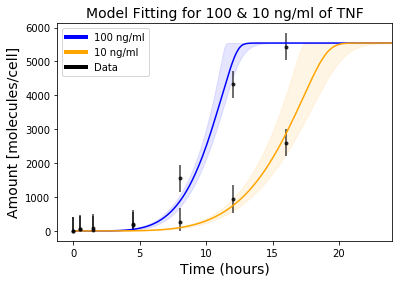

In [9]:
#FOR PLOTTING PERCENTILES 

# x10 = np.array([0, 30, 90, 270, 480,600, 720, 840, 960])
# # x102 = np.array([600, 720, 840, 960])
# y10 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868,
#                 0.088128107774737, 0.17, 0.30055140114867, 0.47])
# # y102 = np.array([0.088128107774737, 0.17, 0.30055140114867, 0.47])

# x100 = np.array([0, 30, 90, 270,480, 600, 720, 840, 960])
# # x1002 = np.array([480, 600, 720, 840, 960])
# y100 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882,
#                   0.2798939020159581, 0.510, .8097294067, 0.95,0.98])

x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 720, 960])
y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])
y1002 = np.array([0.2798939020159581, .7797294067, 0.98])
# plt.figure()

x101 = np.array([0, 30, 90, 270, 480])
x102 = np.array([720, 960])
y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868])
y102 = np.array([0.17, 0.47])
# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
df = pd.concat([result100.dataframe, result10.dataframe],
               keys=['mlkl100', 'mlkl10'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot = {
    ('MLKLa_obs', 'mlkl100'): 'blue',
    ('MLKLa_obs', 'mlkl10'): 'orange'
}

lower_quantile = 0.1  # 10%
upper_quantile = 0.9  # 90%
median = 0.5

fig, ax = plt.subplots()
# plt.figure()
legend_keys = []
for obs_pair, colour in obs_to_plot.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
    ax.plot(time_hrs, quantile_data.loc[:, median], color=colour)
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour,
                    alpha=.1)

# Add the legend

# plt.legend([f'{obs} {group}' for obs, group in obs_to_plot.keys()])
plt.title('Model Fitting for 100 & 10 ng/ml of TNF',fontsize=14) # Title
plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
plt.xlabel('Time (hours)', fontsize = 14) # X label
plt.xlim(xmax =24)
# Add axis labels and title
# plt.set(xlabel='Time (hours)', ylabel='Amount [molecules/cell]', title=f'{model100.name}', fontsize = 14)
# Add grid
# ax.grid()
# plt.scatter(x101/60, y101*5544)
# plt.scatter(x101/60, y1002*5544)
# fig.savefig("necro_pydream_fitting_5k_5620_100_10tnf_wo_10_12hrs.pdf")
# plt.errorbar(x1001/60, y1001,
#              yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
#              (.10,.10,.10,.10)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x1002/60, y1002,
#              yerr= .10, fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x100/60, y10*5544, yerr=350, fmt='.k', ecolor = 'blue', alpha = 0.5, label ='10 ng/ml')
# plt.errorbar(x100/60, y100*5544, yerr=350, fmt='.k', ecolor ='green', alpha = 0.5, label ='100 ng/ml')
plt.errorbar(x1001/60, y1001*5544,
             yerr=[(0, 0.00885691708746097*5544,0.0161886154261265*5544,0.0373005242261882*5544),
             (400,400,400,400)],
                   fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.errorbar(x1002/60, y1002*5544,
             yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.errorbar(x101/60, y101*5544,
             yerr=[(0, 0.0106013664572332*5544,0.00519576571714913*5544,0.02967443048221*5544,
                    0.050022163974868*5544),
             (400,400,400,400,400)],
                   fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.errorbar(x102/60, y102*5544,
             yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='black', lw=4)]
plt.legend(custom_lines, ['100 ng/ml', '10 ng/ml', 'Data'], prop={'size': 10}, loc = 'best')
plt.show()

In [ ]:
tspan = np.linspace(0, 1440, 300)
# x101 = np.array([0, 30, 90, 270, 480,600, 720, 840, 960])
# # x102 = np.array([600, 720, 840, 960])
# y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868,
#                 0.088128107774737, 0.17, 0.30055140114867, 0.47])
# # y102 = np.array([0.088128107774737, 0.17, 0.30055140114867, 0.47])

# x1001 = np.array([0, 30, 90, 270,480, 600, 720, 840, 960])
# # x1002 = np.array([480, 600, 720, 840, 960])
# y1002 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882,
#                   0.2798939020159581, 0.510, .8097294067, 0.95,0.98])
# y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])

plt.figure()
for n in range(len(all_pars)):
    plt.plot(tspan/60, df1.loc[:]['MLKLa_obs'].iloc[:],lw=1.5, color ='green', label ='100 TNF',  zorder = 1, marker ='*', alpha = 0.30)
# plt.scatter(x1001/60, y1002*5544)
    plt.plot(tspan/60, df2.loc[:]['MLKLa_obs'].iloc[:],lw=1.5, color ='blue', label ='10 TNF',  zorder = 1, marker ='*', alpha = 0.30)
# plt.scatter(x101/60, y101*5544)

#     plt.errorbar(x100/60, y100*5544, yerr=210, fmt='.k', ecolor ='green', alpha = 0.5, label ='100 ng/ml')
plt.errorbar(x1001/60, y1001,
             yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
             (.10,.10,.10,.10)],
                   fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
plt.errorbar(x1002/60, y1002,
             yerr= .10, fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount (normalized)", fontsize=15)
plt.title('pMLKL with 100 ng/ml of TNF', fontsize=15)
plt.xlim(xmin = 0, xmax = 24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# custom_lines = [Line2D([0], [0], color='green', lw=4),
#                 Line2D([0], [0], color='blue', lw=4)]
# plt.legend(custom_lines, ['Flip_wt', 'Flip_ko'], prop={'size': 10}, loc = 'best')
# plt.savefig('pmlkl_100tnf_wdata_pydream_best10kpars_t.png',dpi=300)
# plt.ylim(ymin = -10, ymax =100)
# plt.legend(loc='best')
plt.show()

In [ ]:
plt.figure()
for n in range(25000):
    plt.plot(tspan/60, df1.loc[n]['MLKLa_obs'].iloc[:]/5544,lw=1.5, color ='green', label ='Flip_wt',  zorder = 1, marker ='*', alpha = 0.30)
    plt.plot(tspan/60, df5.loc[n]['MLKLa_obs'].iloc[:]/5544,lw=1.5, color ='blue', label ='Flip_ko', zorder = 1, marker ='*', alpha = 0.30)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount (normalized)", fontsize=15)
# plt.title('Flip vs Flip KO with 100 ng/ml of TNF', fontsize=15)
plt.xlim(xmin = 0, xmax = 24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
custom_lines = [Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='blue', lw=4)]
plt.legend(custom_lines, ['Flip_wt', 'Flip_ko'], prop={'size': 10}, loc = 'best')
# plt.savefig('pmlkl_100tnf_wdata_pydream_best10kpars_t.png',dpi=300)
# plt.ylim(ymin = -10, ymax =100)
# plt.legend(loc='best')
plt.show()

In [ ]:
x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 600, 720, 840, 960])
y1002 = np.array([0.2798939020159581, 0.510, .7797294067, 0.95,0.98])
y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])
# plt.figure()

x101 = np.array([0, 30, 90, 270, 480, 600, 720])
x102 = np.array([840, 960])
y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868,0.088128107774737, 0.17])
y102 = np.array([0.30055140114867, 0.47])
# err = 215,264,304,421,1766,3042,4533,5481,5759

# plt.figure()
# for n in range(10000):
#     plt.plot(tspan/60, df1.loc[n]['MLKLa_obs'].iloc[:]/5544,lw=1.5, color ='green',  zorder = 1, marker ='*', alpha = 0.30)
# #     plt.errorbar(x100/60, y100*5544, yerr=210, fmt='.k', ecolor ='green', alpha = 0.5, label ='100 ng/ml')
#     plt.errorbar(x1001/60, y1001,
#                  yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
#                  (.10,.10,.10,.10)],
#                        fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
#     plt.errorbar(x1002/60, y1002,
#                  yerr= .10, fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)

In [ ]:
# x101 = np.array([0, 30, 90, 270, 480,600, 720, 840, 960])
# # x102 = np.array([600, 720, 840, 960])
# y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868,
#                 0.088128107774737, 0.17, 0.30055140114867, 0.47])
# # y102 = np.array([0.088128107774737, 0.17, 0.30055140114867, 0.47])

# x1001 = np.array([0, 30, 90, 270,480, 600, 720, 840, 960])
# # x1002 = np.array([480, 600, 720, 840, 960])
# y1002 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882,
#                   0.2798939020159581, 0.510, .8097294067, 0.95,0.98])

# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
df = pd.concat([wt100.dataframe, wt10.dataframe],
               keys=['mlkl100', 'mlkl10'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot = {
    ('MLKLa_obs', 'mlkl100'): 'blue',
    ('MLKLa_obs', 'mlkl10'): 'orange'
}

lower_quantile = 0.1  # 10%
upper_quantile = 0.9  # 90%
median = 0.5

fig, ax = plt.subplots()
# plt.figure()
legend_keys = []
for obs_pair, colour in obs_to_plot.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
    ax.plot(time_hrs, quantile_data.loc[:, median], color=colour)
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour,
                    alpha=.1)

# Add the legend

# plt.legend([f'{obs} {group}' for obs, group in obs_to_plot.keys()])
# plt.title('wgiubeiod',fontsize=14) # Title
# plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
# plt.xlabel('Time (hours)', fontsize = 14) # X label
# Add axis labels and title
# plt.set(xlabel='Time (hours)', ylabel='Amount [molecules/cell]', title=f'{model100.name}', fontsize = 14)
# Add grid
# ax.grid()
# plt.scatter(x101/60, y101*5544)
# plt.scatter(x101/60, y1002*5544)
plt.errorbar(x1001/60, y1001,
             yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
             (.10,.10,.10,.10)],
                   fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
plt.errorbar(x1002/60, y1002,
             yerr= .10, fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
ax.legend(['pMLKL10', 'pMLKL100'])
# Add axis labels and title
ax.set(xlabel='time (s)', ylabel='Count', title=f'SSA plot for {model10.name}')
# fig.savefig("test.png")
plt.show()

In [10]:
import sys 
sys.path.append('..')
# sys.path.insert(0,'/home/ildefog/pydyno')
import pydyno
print(pydyno.__file__)
from pydyno.discretization.pysb_discretize import PysbDomPath
from pydyno.seqanalysis import SeqAnalysis
from pydyno.visualize_simulations import VisualizeSimulations
from pydyno.visualize_discretization import visualization_path
%matplotlib inline
import random
import h5py

/home/ildefog/miniconda3/envs/calibration/lib/python3.7/site-packages/pydyno/__init__.py


In [11]:
#11:24am
# random.seed(412873)
dp100 = PysbDomPath(model100,result100)
sigs100, paths100 = dp100.get_path_signatures(target='s36', type_analysis='production', 
                                             depth=15, dom_om=0.5)

In [12]:
sigs100.dissimilarity_matrix(n_jobs=1)

array([[  0., 498., 488., ..., 488., 488., 490.],
       [498.,   0., 406., ..., 406., 406., 406.],
       [488., 406.,   0., ...,  92., 100.,  92.],
       ...,
       [488., 406.,  92., ...,   0.,  52.,  68.],
       [488., 406., 100., ...,  52.,   0.,  82.],
       [490., 406.,  92., ...,  68.,  82.,   0.]])

In [13]:
sigs100.silhouette_score_spectral_range(range(2,20), n_jobs=12)

,num_clusters,cluster_silhouette
0,2,0.531367
1,3,0.716655
2,4,0.452499
3,5,0.365764
4,6,0.256791
5,7,0.256323
6,8,0.164538
7,9,0.167706
8,10,0.199782
9,11,0.184089


In [14]:
sigs100.spectral_clustering(3)

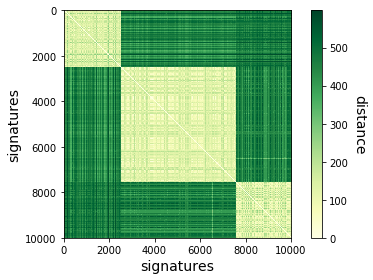

In [23]:
sorted_label_idxs = np.argsort(sigs100.labels)
sorted_diss = sigs100.diss[sorted_label_idxs, :]
sorted_diss = sorted_diss[:, sorted_label_idxs]
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    if not ax:
        ax = plt.gca()
    # Plot the heatmap
    im = ax.imshow(data, **kwargs)
    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")
    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
#     ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)
    return im, cbar
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
im, cbar = heatmap(sorted_diss, range(10000), range(10000), ax=ax,
                   cmap="YlGn", cbarlabel="distance")
ax.figure.axes[-1].yaxis.label.set_size(14)
plt.xlabel('signatures', fontsize = 14)
plt.ylabel('signatures', fontsize = 14)
fig.tight_layout()
# plt.savefig('heatmap_clusters_necro_pydream_5chns_5k_5620_100tnf.pdf')
plt.show()

<Figure size 1440x720 with 0 Axes>

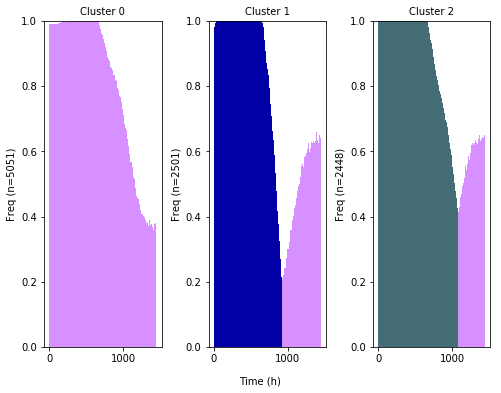

In [16]:
plt.figure(figsize = (20,10))
sigs100.plot_sequences(type_fig='modal')
plt.show()

In [17]:
dp10 = PysbDomPath(model10,result10)
sigs10, paths10 = dp10.get_path_signatures(target='s36', type_analysis='production', 
                                             depth=15, dom_om=0.5)

In [18]:
sigs10.dissimilarity_matrix(n_jobs=1)

array([[  0., 164., 598., ..., 598., 598., 598.],
       [164.,   0., 500., ..., 500., 500., 500.],
       [598., 500.,   0., ...,   0.,   0.,   0.],
       ...,
       [598., 500.,   0., ...,   0.,   0.,   0.],
       [598., 500.,   0., ...,   0.,   0.,   0.],
       [598., 500.,   0., ...,   0.,   0.,   0.]])

In [19]:
sigs10.silhouette_score_spectral_range(range(2,20), n_jobs=12)

,num_clusters,cluster_silhouette
0,2,0.678376
1,3,0.901707
2,4,0.836178
3,5,0.627266
4,6,0.697493
5,7,0.657902
6,8,0.664923
7,9,0.649688
8,10,0.651471
9,11,0.641408


In [21]:
sigs10.spectral_clustering(3)

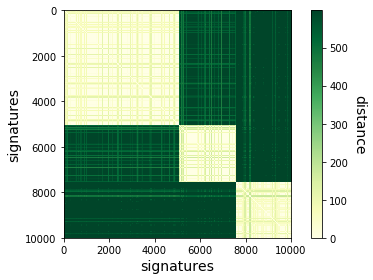

In [22]:
sorted_label_idxs = np.argsort(sigs10.labels)
sorted_diss = sigs10.diss[sorted_label_idxs, :]
sorted_diss = sorted_diss[:, sorted_label_idxs]
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    if not ax:
        ax = plt.gca()
    # Plot the heatmap
    im = ax.imshow(data, **kwargs)
    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")
    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
#     ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)
    return im, cbar
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
im, cbar = heatmap(sorted_diss, range(10000), range(10000), ax=ax,
                   cmap="YlGn", cbarlabel="distance")
ax.figure.axes[-1].yaxis.label.set_size(14)
plt.xlabel('signatures', fontsize = 14)
plt.ylabel('signatures', fontsize = 14)
fig.tight_layout()
# plt.savefig('heatmap_clusters_necro_pydream_5chns_5k_5620_100tnf.pdf')
plt.show()

<Figure size 1440x720 with 0 Axes>

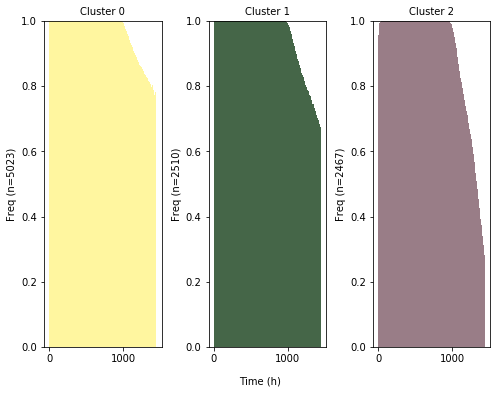

In [24]:
plt.figure(figsize = (20,10))
sigs10.plot_sequences(type_fig='modal')
plt.show()

In [25]:
dp10n = PysbDomPath(model10,result10)
sigs10n, paths10n = dp10n.get_path_signatures(target='s36', type_analysis='production', 
                                             depth=20, dom_om=0.5)

In [26]:
sigs10n.dissimilarity_matrix(n_jobs=1)

array([[  0., 164., 598., ..., 598., 598., 598.],
       [164.,   0., 500., ..., 500., 500., 500.],
       [598., 500.,   0., ...,   0.,   0.,   0.],
       ...,
       [598., 500.,   0., ...,   0.,   0.,   0.],
       [598., 500.,   0., ...,   0.,   0.,   0.],
       [598., 500.,   0., ...,   0.,   0.,   0.]])

In [27]:
sigs10n.silhouette_score_spectral_range(range(2,20), n_jobs=12)

,num_clusters,cluster_silhouette
0,2,0.678266
1,3,0.901539
2,4,0.836045
3,5,0.626540
4,6,0.695912
5,7,0.656683
6,8,0.626849
7,9,0.641747
8,10,0.624289
9,11,0.601741


In [95]:
sigs10n.spectral_clustering(4)

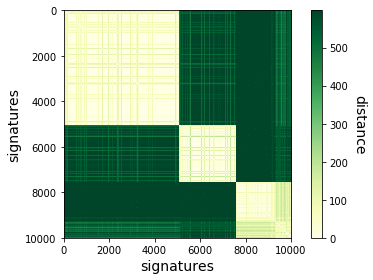

In [97]:
sorted_label_idxs = np.argsort(sigs10n.labels)
sorted_diss = sigs10n.diss[sorted_label_idxs, :]
sorted_diss = sorted_diss[:, sorted_label_idxs]
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    if not ax:
        ax = plt.gca()
    # Plot the heatmap
    im = ax.imshow(data, **kwargs)
    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")
    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
#     ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)
    return im, cbar
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
im, cbar = heatmap(sorted_diss, range(10000), range(10000), ax=ax,
                   cmap="YlGn", cbarlabel="distance")
ax.figure.axes[-1].yaxis.label.set_size(14)
plt.xlabel('signatures', fontsize = 14)
plt.ylabel('signatures', fontsize = 14)
fig.tight_layout()
plt.savefig('heatmap_clusters_necro_pydream_5chns_10k_5720h_100tnf.pdf')
plt.show()

<Figure size 1440x720 with 0 Axes>

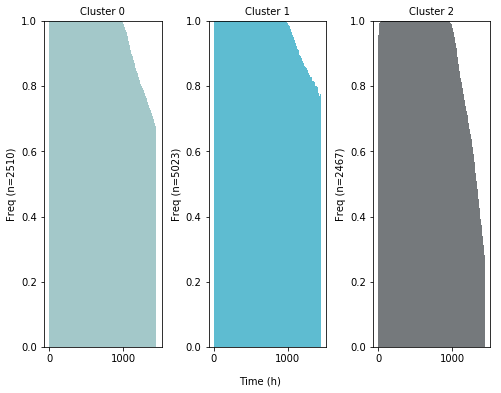

In [30]:
plt.figure(figsize = (20,10))
sigs10n.plot_sequences(type_fig='modal')
plt.show()

In [38]:
dp100n = PysbDomPath(model100,result100)
sigs100n, paths100n = dp100n.get_path_signatures(target='s36', type_analysis='production', 
                                             depth=20, dom_om=1.0, num_processors = 10) 

In [39]:
sigs100n.dissimilarity_matrix(n_jobs=1)

array([[  0., 160., 130., ..., 156., 154., 154.],
       [160.,   0., 164., ..., 204., 222., 150.],
       [130., 164.,   0., ..., 162., 154., 136.],
       ...,
       [156., 204., 162., ...,   0.,  36.,  88.],
       [154., 222., 154., ...,  36.,   0.,  82.],
       [154., 150., 136., ...,  88.,  82.,   0.]])

In [83]:
sigs100n.save('sigs100n_10k_20dp_1om_5720.h5')

In [86]:
save('paths100n_10k_20dp_1om_5720.h5', paths100n)

In [40]:
sigs100n.silhouette_score_spectral_range(range(2,20), n_jobs=12)

,num_clusters,cluster_silhouette
0,2,0.226394
1,3,0.220045
2,4,0.260354
3,5,0.267202
4,6,0.291033
5,7,0.278158
6,8,0.316543
7,9,0.243635
8,10,0.246816
9,11,0.254858


In [45]:
sigs100n.spectral_clustering(4)

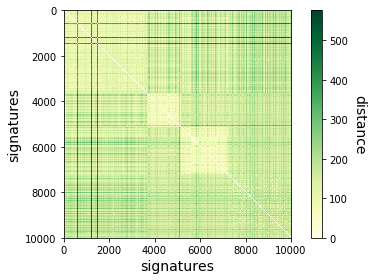

In [46]:
sorted_label_idxs = np.argsort(sigs100n.labels)
sorted_diss = sigs100n.diss[sorted_label_idxs, :]
sorted_diss = sorted_diss[:, sorted_label_idxs]
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    if not ax:
        ax = plt.gca()
    # Plot the heatmap
    im = ax.imshow(data, **kwargs)
    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")
    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
#     ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)
    return im, cbar
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
im, cbar = heatmap(sorted_diss, range(10000), range(10000), ax=ax,
                   cmap="YlGn", cbarlabel="distance")
ax.figure.axes[-1].yaxis.label.set_size(14)
plt.xlabel('signatures', fontsize = 14)
plt.ylabel('signatures', fontsize = 14)
fig.tight_layout()
# plt.savefig('heatmap_clusters_necro_pydream_5chns_5k_5620_100tnf.pdf')
plt.show()

<Figure size 1440x720 with 0 Axes>

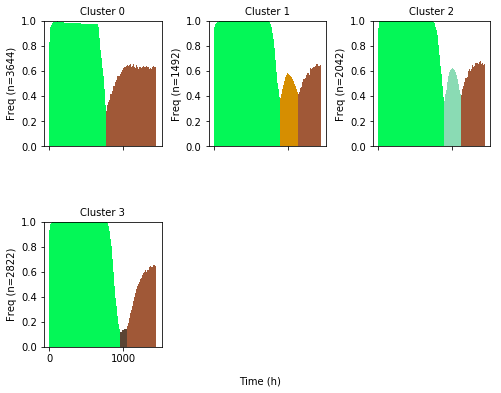

In [47]:
plt.figure(figsize = (20,10))
sigs100n.plot_sequences(type_fig='modal')
plt.show()

In [48]:
vt = VisualizeSimulations(model100, sim_results=result100, 
                          clusters=sigs100n.labels)

In [ ]:
vt.plot_cluster_dynamics(components=['MLKLa_obs'])

In [51]:
cluster_label_idxs = VisualizeSimulations.check_clusters_arg(sigs100n.labels, nsims=10000)

In [56]:
pars_cluster_0 = result100.param_values[cluster_label_idxs[0]]
print(len(pars_cluster_0))

3644


In [57]:
pars_cluster_1 = result100.param_values[cluster_label_idxs[1]]
print(len(pars_cluster_1))

1492


In [55]:
pars_cluster_2 = result100.param_values[cluster_label_idxs[2]]
print(len(pars_cluster_2))

2042


In [67]:
pars_cluster_3 = result100.param_values[cluster_label_idxs[3]]
print(len(pars_cluster_3))

2822


In [58]:
np.save('necro_pars10k_cluster0_5720.npy', pars_cluster_0)

In [59]:
np.save('necro_pars10k_cluster1_5720.npy', pars_cluster_1)

In [60]:
np.save('necro_pars10k_cluster2_5720.npy', pars_cluster_2)

In [68]:
np.save('necro_pars10k_cluster3_5720.npy', pars_cluster_3)

In [61]:


rep_signatures=sigs100n.seq_representativeness(method='centrality', clus_labels=sigs100n.labels)



In [62]:
print(rep_signatures[0])

((3528, 1), array([77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77,
       77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77,
       77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77,
       77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77,
       77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77,
       77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77,
       77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77,
       77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77,
       77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 83,
       83, 83, 83, 83, 38, 83, 83, 83, 83, 38, 38, 83, 83, 83, 83, 38, 38,
       83, 83, 83, 38, 38, 38, 83, 83, 83, 38, 38, 38, 83, 83, 83, 83, 83,
       83, 83, 83, 38, 38, 38, 83, 83, 83, 38, 83, 83, 83, 83, 83, 83, 83,
       83, 83, 83, 38, 38, 38, 83, 83, 83, 83, 83, 83, 83, 83, 38, 38, 38,
       83, 83

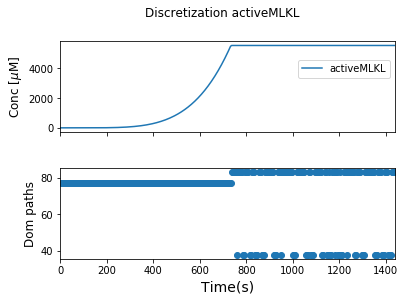

In [89]:
from pydyno.visualize_discretization import visualization_seq_paths
visualization_seq_paths(result100, 3528, sigs100n)

In [90]:
visualization_path(model100, paths100n[77], type_analysis='production', 
                   filename='cluster0100tnf_arrestin_s36_prod_05om_depth15_path77_10k_5720.png')
visualization_path(model100, paths100n[83], type_analysis='production', 
                   filename='cluster0100tnf_arrestin_s36_prod_05om_depth15_path83_10k_5720.png')
visualization_path(model100, paths100n[38], type_analysis='production', 
                   filename='cluster0100tnf_arrestin_s36_prod_05om_depth15_path38_10k_5720.png')

In [63]:
print(rep_signatures[1])

((6785, 1), array([ 77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,
        77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,
        77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,
        77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,
        77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,
        77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,
        77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,
        77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,
        77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,
        77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,
        77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,
        77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,
        77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,
        77,  77,  77,  77,  77,  77,  77,  77,  77, 

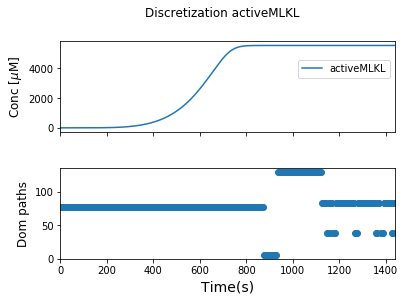

In [91]:
visualization_seq_paths(result100, 6785, sigs100n)

In [92]:
visualization_path(model100, paths100n[77], type_analysis='production', 
                   filename='cluster1100tnf_arrestin_s36_prod_05om_depth15_path77_10k_5720.png')
visualization_path(model100, paths100n[6], type_analysis='production', 
                   filename='cluster1100tnf_arrestin_s36_prod_05om_depth15_path6_10k_5720.png')
visualization_path(model100, paths100n[129], type_analysis='production', 
                   filename='cluster1100tnf_arrestin_s36_prod_05om_depth15_path129_10k_5720.png')
visualization_path(model100, paths100n[83], type_analysis='production', 
                   filename='cluster1100tnf_arrestin_s36_prod_05om_depth15_path83_10k_5720.png')
visualization_path(model100, paths100n[38], type_analysis='production', 
                   filename='cluster1100tnf_arrestin_s36_prod_05om_depth15_path38_10k_5720.png')

In [64]:
print(rep_signatures[2])

((5420, 1), array([ 77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,
        77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,
        77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,
        77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,
        77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,
        77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,
        77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,
        77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,
        77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,
        77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,
        77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,
        77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,
        77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,
        77,  77,  77,  77,  77,  77,  77,  77,  77, 

In [93]:
visualization_path(model100, paths100n[77], type_analysis='production', 
                   filename='cluster2100tnf_arrestin_s36_prod_05om_depth15_path77_10k_5720.png')
visualization_path(model100, paths100n[24], type_analysis='production', 
                   filename='cluster2100tnf_arrestin_s36_prod_05om_depth15_path24_10k_5720.png')
visualization_path(model100, paths100n[117], type_analysis='production', 
                   filename='cluster2100tnf_arrestin_s36_prod_05om_depth15_path117_10k_5720.png')
visualization_path(model100, paths100n[83], type_analysis='production', 
                   filename='cluster2100tnf_arrestin_s36_prod_05om_depth15_path83_10k_5720.png')
visualization_path(model100, paths100n[38], type_analysis='production', 
                   filename='cluster2100tnf_arrestin_s36_prod_05om_depth15_path38_10k_5720.png')

In [69]:
print(rep_signatures[3])

((4230, 1), array([77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77,
       77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77,
       77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77,
       77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77,
       77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77,
       77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77,
       77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77,
       77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77,
       77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77,
       77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77,
       77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77,
       77, 77, 77, 77, 99, 99, 99, 99, 99, 99, 96, 96, 96, 96, 96, 96, 96,
       96, 96, 96, 96, 96, 96, 96, 96, 96, 83, 83, 83, 83, 83, 83, 83, 83,
       38, 83

In [94]:
visualization_path(model100, paths100n[77], type_analysis='production', 
                   filename='cluster3100tnf_arrestin_s36_prod_05om_depth15_path77_10k_5720.png')
visualization_path(model100, paths100n[99], type_analysis='production', 
                   filename='cluster3100tnf_arrestin_s36_prod_05om_depth15_path99_10k_5720.png')
visualization_path(model100, paths100n[96], type_analysis='production', 
                   filename='cluster3100tnf_arrestin_s36_prod_05om_depth15_path96_10k_5720.png')
visualization_path(model100, paths100n[83], type_analysis='production', 
                   filename='cluster3100tnf_arrestin_s36_prod_05om_depth15_path83_10k_5720.png')
visualization_path(model100, paths100n[38], type_analysis='production', 
                   filename='cluster3100tnf_arrestin_s36_prod_05om_depth15_path38_10k_5720.png')

In [65]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

X_embedded = TSNE(n_components=2, metric='precomputed', perplexity=50,
                  early_exaggeration=30).fit_transform(sigs100n.diss)

In [87]:
colors = ['#000000', '#006FA6', '#1CE6FF', '#FF34FF', '#FF4A46', '#008941', '#FF35FF']

In [77]:
colors = ['red', 'blue', 'black', 'green', 'cyan', 'yellow', 'orange']

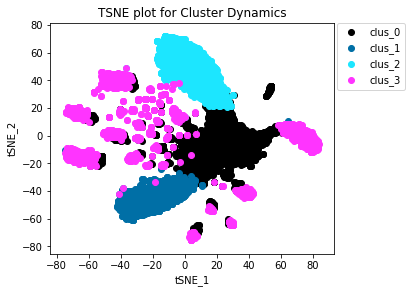

In [103]:
cluster0 = sigs100n.labels == 0
cluster1 = sigs100n.labels == 1
cluster2 = sigs100n.labels == 2
cluster3 = sigs100n.labels == 3
# cluster4 = signatures.labels == 4
# cluster5 = signatures.labels == -1

plt.scatter(X_embedded[cluster0, 0], X_embedded[cluster0, 1], c=colors[0], label='clus_0')
plt.scatter(X_embedded[cluster1, 0], X_embedded[cluster1, 1], c=colors[1], label='clus_1')
plt.scatter(X_embedded[cluster2, 0], X_embedded[cluster2, 1], c=colors[2], label='clus_2')
plt.scatter(X_embedded[cluster3, 0], X_embedded[cluster3, 1], c=colors[3], label='clus_3')
# plt.scatter(X_embedded[cluster4, 0], X_embedded[cluster4, 1], c=colors[4], label='clus_4')
# plt.scatter(X_embedded[cluster5, 0], X_embedded[cluster5, 1], c=colors[5], label='clus_5')

plt.legend(bbox_to_anchor=(1.25,1), borderaxespad=0)
plt.xlabel('tSNE_1')
plt.ylabel('tSNE_2')
plt.tight_layout()
plt.title('TSNE plot for Cluster Dynamics')
plt.savefig('necro_5720_10k_100tnf_sequences_cluster.pdf')
plt.show()